In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from pygraphon.graphons import graphon_logit_sum
from pygraphon.utils.utils_graph import edge_density
from pygraphon.graphons.StepGraphon import StepGraphon
from pygraphon.plots.plot_matrices import spy

from pygraphon.estimators import HistogramEstimator, SAS
from pygraphon.norm import MseProbaEdge, AUCEdge, AUPRCEdge

from pygraphon.estimators.BaseEstimator import BaseEstimator
from pygraphon.graphons import Graphon

C:\Users\verdeyme\AppData\Local\Temp\ipykernel_22588\1888121702.py:10: UserWarning: n_nodes is deprecated and has no effect
  norm_auc = AUCEdge(n_nodes = 300)
C:\Users\verdeyme\AppData\Local\Temp\ipykernel_22588\1888121702.py:11: UserWarning: n_nodes is deprecated and has no effect
  norm_auprc = AUPRCEdge(n_nodes = 300)


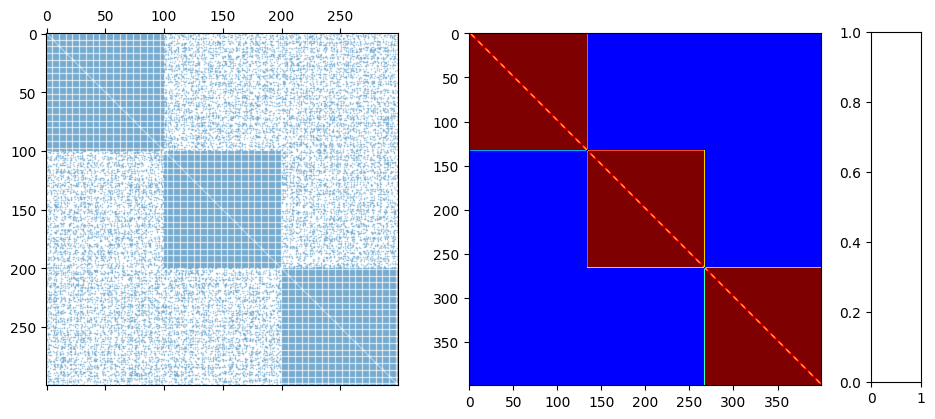

In [19]:
#Set the matrix of theta
graphon_matrix = np.array([[0.8,0.1,0.1],[0.1,0.8,0.1],[0.1,0.1,0.8]])
#set up normalised graphon with graphon
graphon = StepGraphon(graphon_matrix,1/3)
#graphon = graphon_logit_sum


A = graphon.draw(rho = 1,n = 300, exchangeable=False)
norm_mse = MseProbaEdge(n_nodes = 300)
norm_auc = AUCEdge(n_nodes = 300)
norm_auprc = AUPRCEdge(n_nodes = 300)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
im = ax[1].imshow(graphon.get_edge_probabilities(400,False,True), cmap='jet')
_ = spy(A, ax=ax[0])
#ax[0].imshow(A.astype(int), cmap='jet')
plt.show()

In [20]:
hist = HistogramEstimator(method = "matlab")
print('begin fit')
hist.fit(graph= A, bandwidthHist= None)

begin fit


Log likelihood: -0.9139:   1%|          | 5/500 [00:03<06:12,  1.33it/s]


In [21]:
diff_mse = norm_mse(graphon, hist)
diff_auc  = norm_auc(graphon, hist, A)
diff_aucpr = norm_auprc(graphon, hist, A)

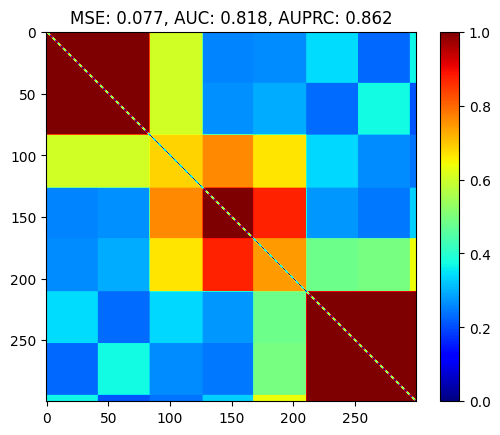

In [22]:
plt.imshow(hist.get_graphon().get_edge_probabilities(300,False,True), cmap = "jet")
plt.title(f"MSE: {diff_mse:.3f}, AUC: {diff_auc:.3f}, AUPRC: {diff_aucpr:.3f}")
plt.colorbar()

In [23]:
hist_charles = HistogramEstimator(method="mine")
hist_charles.fit(graph=A, bandwidthHist=None)

Log likelihood: -0.9140:   1%|          | 5/500 [00:03<06:10,  1.33it/s]


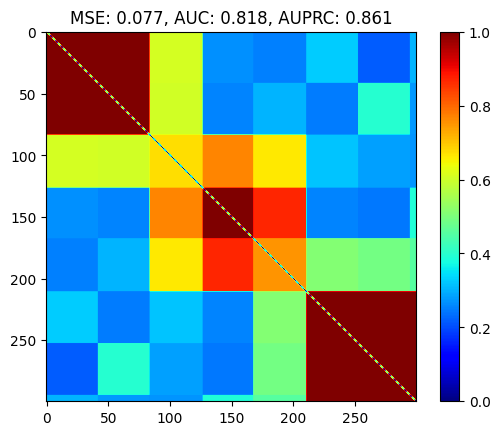

In [24]:
diff_mse_charles = norm_mse(graphon, hist_charles)
diff_auc_charles = norm_auc(graphon, hist_charles, A)
diff_aucpr_charles = norm_auprc(graphon, hist_charles, A)
plt.imshow(hist_charles.get_graphon().get_edge_probabilities(
    300, False, True), cmap="jet")
plt.title(
    f"MSE: {diff_mse_charles:.3f}, AUC: {diff_auc_charles:.3f}, AUPRC: {diff_aucpr_charles:.3f}")
plt.colorbar()

In [25]:
print(hist_charles.get_graphon().get_edge_probabilities(
    300, False, True).shape)
print(hist_charles.get_graphon().get_edge_probabilities(
    300, False, False).shape)

(300, 300)
(44850,)
